# Morhunenko Mykola lab6 CV

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

#### After 3-4 trying I desided to make a marging for the second image

In [2]:
img_ = cv2.imread('stitching/1.jpg')
img = cv2.imread('stitching/2.jpg')

ht1, wd1, cc1= img_.shape
ht2, wd2, cc2= img.shape
color = (0,0,0)
result = np.full((555,wd1 + wd2,cc1), color, dtype=np.uint8)
result[0:ht2, wd1:wd1 + wd2] = img
# plt.imshow(result)
img = result

img1 = cv2.cvtColor(img_,cv2.COLOR_BGR2GRAY)
img2 = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

#### BRISK 

In [5]:
brisk = cv2.BRISK_create()

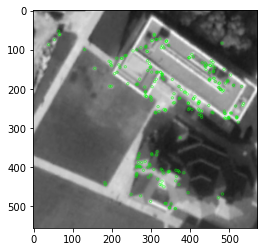

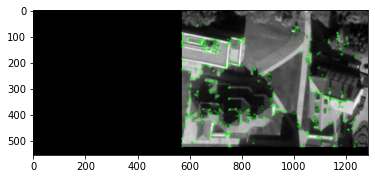

(<matplotlib.image.AxesImage at 0x7fa268929dc0>, None)

In [6]:
kp1, des1 = brisk.detectAndCompute(img1,None)
kp2, des2 = brisk.detectAndCompute(img2,None)

i1 = cv2.drawKeypoints(img1, kp1, None, color=(0,255,0), flags=0)
i2 = cv2.drawKeypoints(img2, kp2, None, color=(0,255,0), flags=0)
plt.imshow(i1), plt.show()
plt.imshow(i2), plt.show()

In [7]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True) 
matches = matcher.match(des2,des1) 

In [8]:
matches = sorted(matches, key=lambda x:x.distance)
final_img = cv2.drawMatches(img, kp2,img_, kp1, matches,None) 

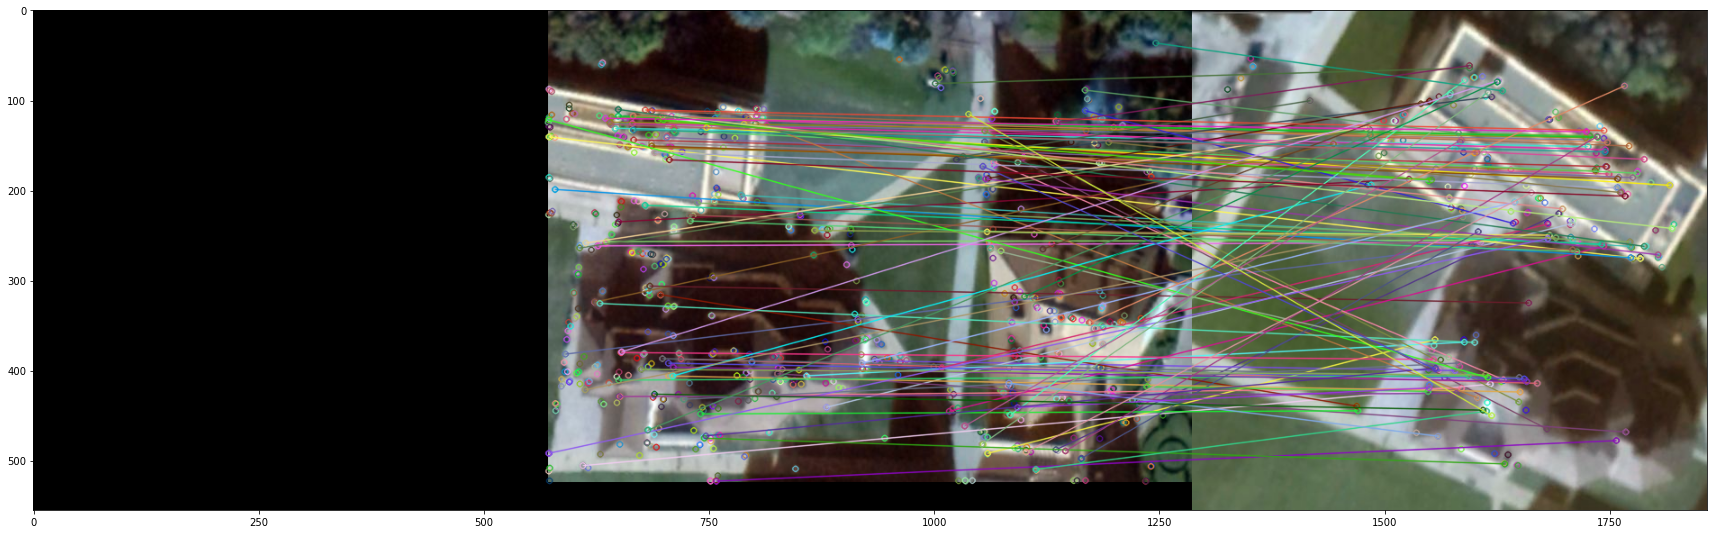

In [9]:
plt.figure(figsize = (30,30))
plt.imshow(final_img)

In [10]:
src_pts = np.float32([ kp2[m.queryIdx].pt for m in matches ]).reshape(-1,1,2)

dst_pts = np.float32([ kp1[m.trainIdx].pt for m in matches ]).reshape(-1,1,2)

M, mask = cv2.findHomography(dst_pts, src_pts, cv2.RANSAC, 5.0)


In [ ]:
M

#### I don\`t know for sure what does each entry means

In [12]:
h,w = img1.shape
pts = np.float32([ [0,0],[0,h-1],[w-1,h-1],[w-1,0] ]).reshape(-1,1,2)
dst = cv2.perspectiveTransform(pts, M)
img1 = cv2.polylines(img1,[np.int32(dst)],True,255,3, cv2.LINE_AA)

In [13]:
dst = np.full((img.shape[1] + img_.shape[1],img_.shape[0],cc1), color, dtype=np.uint8)

In [ ]:
dst = cv2.warpPerspective(img_,M,(img.shape[1] + img_.shape[1], img_.shape[0]))
# dst[0:img.shape[0],0:img.shape[1]] = img
plt.figure(figsize = (30,30))
plt.imshow(dst)


#### So we get the scaled and warped image

In [15]:

def trim(frame):
    if not np.sum(frame[0]):
        return trim(frame[1:])
    if not np.sum(frame[-1]):
        return trim(frame[:-2])
    if not np.sum(frame[:,0]):
        return trim(frame[:,1:])
    if not np.sum(frame[:,-1]):
        return trim(frame[:,:-2])
    return frame


In [ ]:
dst = dst[0:dst.shape[0], 0:img.shape[1]]

#### As far as I don't know all that AI stuff, I found the next way to add two images (because of that marging they can not easily overlap)

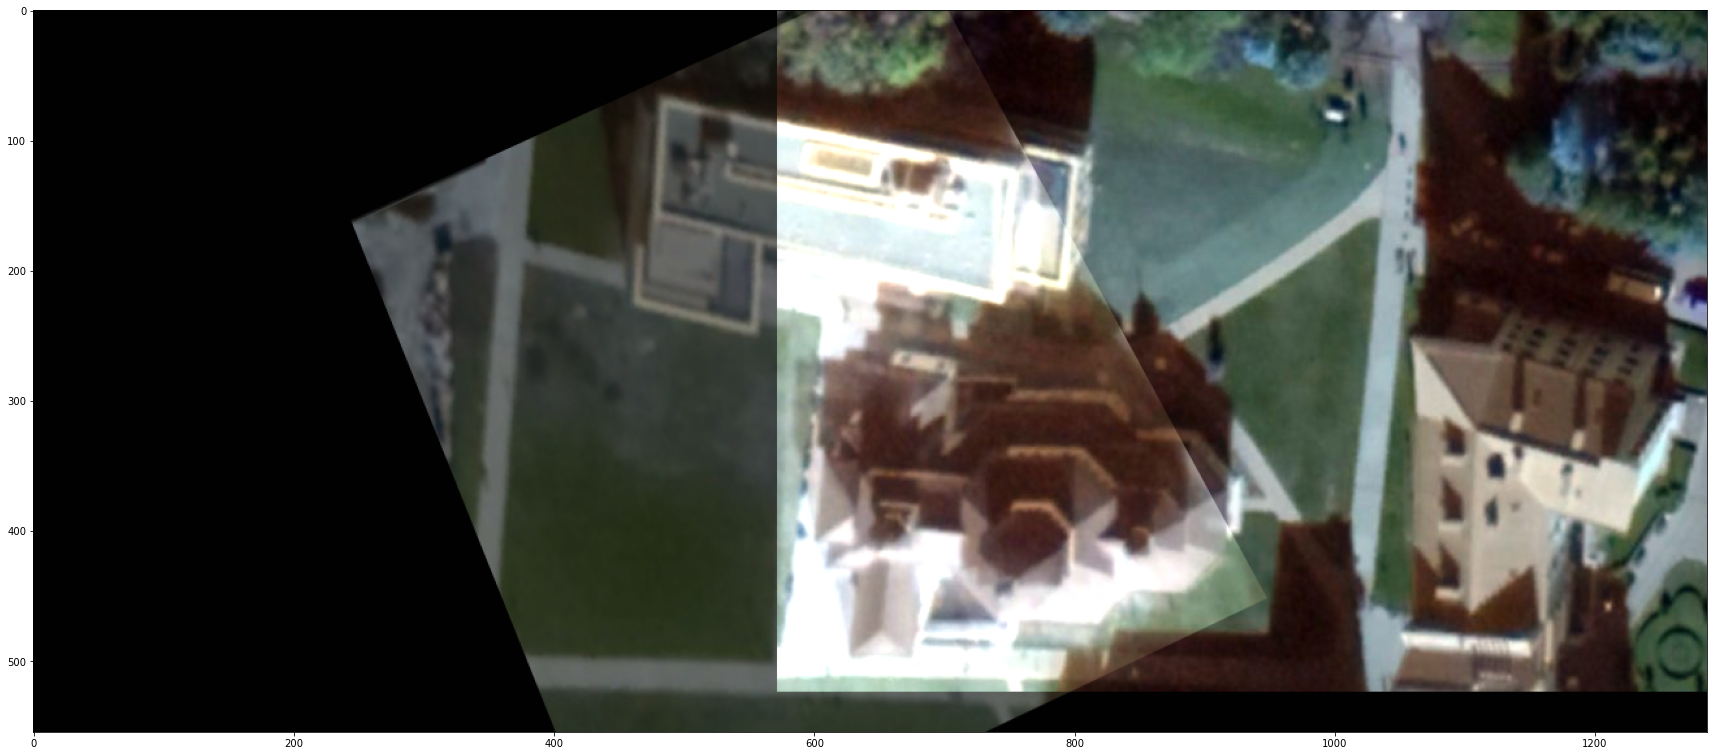

In [17]:
# plt.imshow(dst)
plt.figure(figsize = (30,30))
# img = cv2.bitwise_xor(img, dst)
added_image = cv2.addWeighted(img,1,dst,0.5,1)
plt.imshow(added_image)

In [18]:
cv2.imwrite("added.jpg", added_image)

True